In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import pandas as pd
import os
from datetime import datetime

In [3]:
fname = 'data/FB6Prediction.csv'
columns = ['Time', 'Level']
data = pd.read_csv(fname, header=None, names = columns)

# # Number of samplepoints
# sample spacing
T = 360
t = []
heights = []
N = 0

for x in data.Time:
    if (x != 'Time'):
        datetime_object = datetime.strptime(x, '%x  %H:%M')
        t.append((datetime_object-datetime(2016,9,16,0,0)).total_seconds())
        N = N+1

for y in data.Level:
    if (y != 'Level'):
        heights.append(float(y))

[  0.00000000e+00   3.61784029e-07   7.23568059e-07 ...,   1.38816532e-03
   1.38852710e-03   1.38888889e-03]


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  


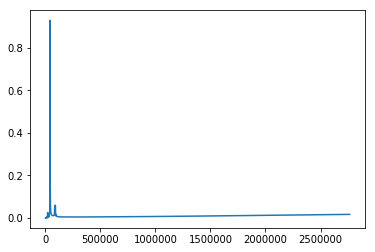

In [4]:
yf = scipy.fftpack.fft(heights)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
print xf

fig, ax = plt.subplots()
ax.plot(1/xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()